# Kaggle: COVID Tweet Sentiment Classification

This is a solution for Kaggle project: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

Twitter is a place to express thoughts and ideas and spread news and information, thus makes it a great source to track trends worldwide. Through the collected tweets, we can evaluate people's attitude toward Covid and pandemic through the trending keywords and tags through time. The estimator can be useful for identifying inappropriate tweets and stop toxic propaganda or evaluating strategies to promote social distancing using trend words.

The task is to classify tweet sentiments in given tweets.

This notebook approach this NLP task using TensorFlow neural network.

Data has following columns:

|Column |Notes |
|:------|:-------|
UserName | User ID
ScreenName| User display name
Location | User location
TweetAt | Date
OriginalTweet | Tweet content
Sentiment | Extremely negative, Negative, Neutral, Positive, Extremely positive

## Load modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import json
import requests
import re
import string

pd.options.display.max_colwidth = 100

## Load data

In [2]:
train_df = pd.read_csv("Corona_NLP_train.csv", header=0, encoding='latin1')
test_df = pd.read_csv("Corona_NLP_test.csv", header=0, encoding='latin1')

In [3]:
train_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, pe...",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he comme...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #cov...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business ...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment m...",Negative


In [4]:
test_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-...",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack...",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News ...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at t...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without protecting #healthworkers.\r\r\nPrices of surgical ma...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ...,Extremely Positive


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## Clean data
### Handle useless column
Both UserName and ScreenName identify a user. We don't need both.

In [7]:
print(len(set(train_df.ScreenName)) == len(set(train_df.UserName)))
print(len(set(test_df.ScreenName)) == len(set(test_df.UserName)))

True
True


In [8]:
train_df.drop(columns="ScreenName", inplace=True)
test_df.drop(columns="ScreenName", inplace=True)
train_df.set_index("UserName", inplace=True)
test_df.set_index("UserName", inplace=True)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 3799 to 44955
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


## EDA
## Sentiment

In [10]:
set(train_df.Sentiment)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

<AxesSubplot:>

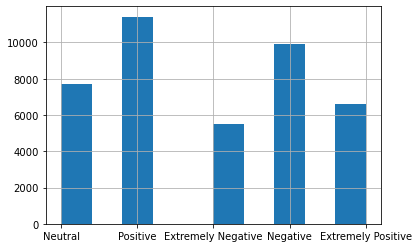

In [11]:
train_df.Sentiment.hist()

If extreme positive and positive corpus have similar keywords and extreme negative and negative corpus have similar keywords, that makes it imbalanced for Neutral tweet since the neutral keywords are different from others.

## Encode sentiment
0 being extremely negative tweets and 4 being extremely positive tweets.

In [12]:
sentiment_encoder = LabelEncoder().fit(train_df.Sentiment)
train_df["Sentiment_encode"] = sentiment_encoder.transform(train_df.Sentiment)
test_df["Sentiment_encode"] = sentiment_encoder.transform(test_df.Sentiment)
target_len = len(set(train_df.Sentiment))

## Encode sentiment differently
After one round of training, one of the observations is that extreme tone is easily confused with regular tone. Combine extreme negative with negative and extreme positive with positive to eliminate "noise".

In [13]:
# encoder = {'Extremely Negative': 0,
#            'Negative': 0,
#            'Neutral': 1, 
#            'Positive': 2,
#            'Extremely Positive': 2}
           
# train_df.Sentiment = train_df.Sentiment.map(encoder)
# test_df.Sentiment = test_df.Sentiment.map(encoder)

# target_len = len(set(encoder.values()))

## TweetAt
Training set is a collection of a month worth of tweets during 16MAR2020 to 14APR202.

Test set is a collection of tweets during 02MAR2020 to 16MAR202. No overlaps with training data.

In [14]:
set(train_df.TweetAt)

{'01-04-2020',
 '02-04-2020',
 '03-04-2020',
 '04-04-2020',
 '05-04-2020',
 '06-04-2020',
 '07-04-2020',
 '08-04-2020',
 '09-04-2020',
 '10-04-2020',
 '11-04-2020',
 '12-04-2020',
 '13-04-2020',
 '14-04-2020',
 '16-03-2020',
 '17-03-2020',
 '18-03-2020',
 '19-03-2020',
 '20-03-2020',
 '21-03-2020',
 '22-03-2020',
 '23-03-2020',
 '24-03-2020',
 '25-03-2020',
 '26-03-2020',
 '27-03-2020',
 '28-03-2020',
 '29-03-2020',
 '30-03-2020',
 '31-03-2020'}

In [15]:
set(test_df.TweetAt)

{'02-03-2020',
 '03-03-2020',
 '04-03-2020',
 '05-03-2020',
 '06-03-2020',
 '07-03-2020',
 '08-03-2020',
 '09-03-2020',
 '10-03-2020',
 '11-03-2020',
 '12-03-2020',
 '13-03-2020',
 '14-03-2020',
 '15-03-2020',
 '16-03-2020'}

In [16]:
# check if any tweet in training set on 16MAR2020 duplicated with tweets in test set
pd.concat([train_df[train_df.TweetAt=="16-03-2020"], test_df[test_df.TweetAt=="16-03-2020"]]).duplicated().sum()

0

## Encode TweetAt
According to Google search, the first COVID case was reported on December 31, 2019. Mark 01JAN2020 as first day and count the number of days till tweet date. It also converts date to numerical data.

In [17]:
delta_days = []
first_date = datetime.datetime.strptime("01-01-2020", '%d-%m-%Y')
first_date = datetime.date(first_date.year, first_date.month, first_date.day)

for date in train_df.TweetAt.values:
    tweet_date = datetime.datetime.strptime(date, '%d-%m-%Y')
    tweet_date = datetime.date(tweet_date.year, tweet_date.month, tweet_date.day)
    delta_day = tweet_date - first_date
    delta_days.append(delta_day.days)

train_df['TweetAtInDays'] = delta_days

In [18]:
train_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_encode,TweetAtInDays
UserName,,,,,,
3799,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,3,75
3800,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,4,75
3801,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,4,75
3802,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,4,75
3803,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,0,75


In [19]:
# show days since 01JAN2020, its corresponding date, and the average tweet sentiment on that date
train_df.sort_values(by="TweetAtInDays").groupby(['TweetAtInDays', 'TweetAt']).Sentiment_encode.describe()

,,count,mean,std,min,25%,50%,75%,max
TweetAtInDays,TweetAt,,,,,,,,
75,16-03-2020,656.0,2.282012,1.403827,0.0,1.0,2.0,4.0,4.0
76,17-03-2020,1977.0,2.244310,1.382547,0.0,1.0,2.0,4.0,4.0
77,18-03-2020,2742.0,2.253100,1.405460,0.0,1.0,2.0,4.0,4.0
78,19-03-2020,3215.0,2.260342,1.393725,0.0,1.0,2.0,4.0,4.0
79,20-03-2020,3448.0,2.217807,1.417638,0.0,1.0,2.0,4.0,4.0
80,21-03-2020,2653.0,2.266114,1.376122,0.0,1.0,2.0,4.0,4.0
81,22-03-2020,2114.0,2.292337,1.385363,0.0,1.0,2.0,4.0,4.0
82,23-03-2020,2062.0,2.389913,1.367203,0.0,1.0,2.0,4.0,4.0
83,24-03-2020,1480.0,2.310135,1.374610,0.0,1.0,2.0,4.0,4.0


<AxesSubplot:title={'center':'Average tweet sentiment per day'}, xlabel='TweetAtInDays'>

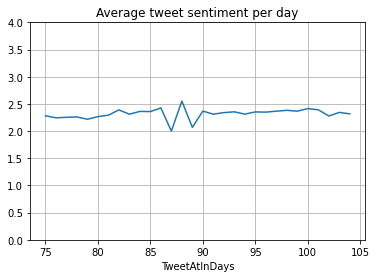

In [20]:
# plot average tweet sentiment each day
train_df.groupby(['TweetAtInDays']).Sentiment_encode.mean().plot(ylim=[0,4], grid=True, title="Average tweet sentiment per day")

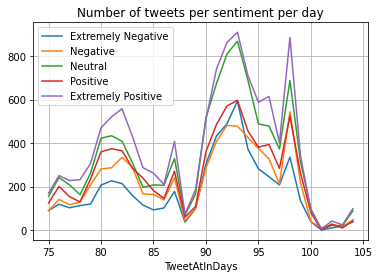

In [21]:
# Plot number of tweet of each sentiment each day
index = train_df.groupby(['TweetAtInDays']).size().index
values = {'0':train_df[train_df.Sentiment_encode==0].groupby(['TweetAt']).size().to_list(), 
          '1':train_df[train_df.Sentiment_encode==1].groupby(['TweetAt']).size().to_list(), 
          '2':train_df[train_df.Sentiment_encode==2].groupby(['TweetAt']).size().to_list(),
          '3':train_df[train_df.Sentiment_encode==3].groupby(['TweetAt']).size().to_list(),
          '4':train_df[train_df.Sentiment_encode==4].groupby(['TweetAt']).size().to_list(),}
num_tweet_count = pd.DataFrame(values, index=index)
# num_tweet_count.plot.bar(stacked=True)
num_tweet_count.plot(grid=True, title="Number of tweets per sentiment per day")
plt.legend(["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])

- In general, number of positive tweets is slighty more than negative, thus making the overall tweets sentiment per day little above neutral, which is 1.
- Number of positive and negative tweets changes drastically, especially during day 88 to day 98, which is between 29MAR2020 to 08APR2020.
- Number of neutral tweets doesn't vary as much.

## Keep most tagged accounts
Discard tagged accounts to eliminate noise and keep only the most frequently tagged accounts.

In [22]:
tag_list = []
for tweet in train_df.index.values:
    tag_list += re.findall(r'@\w+', train_df.loc[tweet, "OriginalTweet"])

In [23]:
tag_df = pd.DataFrame(tag_list)
tag_sort = pd.DataFrame(tag_df.value_counts(ascending=False))
print(tag_sort.head(20))

                    0
0                    
@realDonaldTrump  247
@Tesco            185
@sainsburys       161
@BorisJohnson     150
@narendramodi     111
@amazon           109
@asda             105
@PMOIndia          96
@Morrisons         90
@piersmorgan       85
@YouTube           83
@waitrose          71
@CNN               61
@AldiUK            54
@Walmart           53
@FTC               52
@CDCgov            49
@NYGovCuomo        43
@BBCNews           42
@SkyNews           41


In [24]:
# Keep most frquently tagged accounts:
top_tags = [acct[0] for acct in tag_sort.index.values[:10]]

## Keep most popular hashtags
Discard hashtags to eliminate noise and keep only the most popular hashtags.

In [25]:
hash_list = []
for tweet in train_df.index.values:
    hash_list += re.findall(r'#\w+', train_df.loc[tweet, "OriginalTweet"])

In [26]:
hash_df = pd.DataFrame(hash_list)
hash_sort = pd.DataFrame(hash_df.value_counts(ascending=False))
print(hash_sort.head(20))

                          0
0                          
#coronavirus          12954
#COVID19               3364
#Covid_19              2589
#Coronavirus           2333
#COVID2019             1634
#toiletpaper           1410
#COVID                 1284
#covid19               1127
#CoronaCrisis           734
#CoronaVirus            645
#SocialDistancing       641
#covid_19               440
#pandemic               414
#CoronavirusPandemic    414
#CoronavirusOutbreak    400
#Covid19                347
#StayHomeSaveLives      345
#lockdown               329
#StayAtHome             322
#supermarket            321


In [27]:
# Keep most popular hashtags:
# Exclude #covid* and #corova* because those tags were criteria used to collect data and hence in most of the tweets.
top_hashtags = [tag[0] for tag in hash_sort.index.values[:30] 
                if "covid" not in tag[0].lower() and "corona" not in tag[0].lower()]

## Collect stop words
Remove common words using stopwords in NLTK module and add other potential common/uninformative words by reviewing the OriginalTweet.

In [28]:
nltk.download('stopwords')
stop_words = list(set(nltk.corpus.stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
print(stop_words)

['i', 'does', 'such', 'ain', 'their', 'needn', "didn't", 'his', 'in', 'so', "she's", 'after', 'its', 'up', 'haven', 'my', 'won', 'a', 're', 'under', 'any', 'few', 'not', 'for', 'yours', 've', "shouldn't", "it's", 'itself', 'or', 'mightn', "you'll", 'the', 'above', 'were', 'she', 'is', 's', 'as', 'against', 'why', 'further', 'being', 'about', "hadn't", 'only', 'when', 'too', 'those', 'that', 'own', 'same', 'theirs', 'her', 'did', 't', 'once', 'again', 'through', 'y', 'below', 'with', 'can', "aren't", 'at', 'do', 'he', "you'd", "haven't", 'than', 'most', 'wouldn', 'to', 'having', 'aren', 'during', "wasn't", "weren't", 'from', 'but', 'him', 'yourselves', 'what', 'all', 'more', 'has', 'of', "isn't", 'you', 'shan', 'myself', "you've", 'just', 'our', 'll', 'them', 'these', 'o', 'ma', 'yourself', 'ourselves', 'your', 'was', 'some', 'd', 'between', 'on', 'weren', 'm', 'herself', 'doing', 'where', 'are', "needn't", 'down', 'into', 'over', 'an', 'me', 'while', "won't", 'couldn', 'hers', "wouldn'

## Expand stop words
1. After cleaning the OriginalTweet, run an eyeball test and expand stop word.

2. After one round of training, examine tokens and include unnecessary tokens to stop word collection.

In [30]:
stop_words += ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "l", "m", "n", "o", "p", "q", "r", 
               "s", "t", "u", "v", "w", "x", "y", "z"]
stop_words += ["in", "on", "at", "via", "due", "could", "would", "may", "one", "still", 
               "even", "also", "every", "two", "etc", "per"]

## Examine tokens
This step is done after one round of training, and come back to examine and normalize tokens. 

1. Stemming is the process of eliminating affixes (suffixed, prefixes, infixes, circumfixes) from a word in order to obtain a word stem.
    - Example: running → run
2. Lemmatization is related to stemming, differing in that lemmatization is able to capture canonical forms based on a word's lemma.
    - Example: better → good

In [31]:
# tokens = pd.DataFrame(dict(tokenizer.word_counts).values(), index=dict(tokenizer.word_counts).keys())

In [32]:
# # show top 100 most used tokens
# tokens.sort_values(by=0, ascending=False).iloc[0:100].index

## Stemming
Create a dictionary to reducing words to their word stem.

In [33]:
stemming_dict = {"buying":"buy", "bought":"buy", "working":"work", "worked":"work", "shopping":"shop", "shopped":"shop",
                 "shops":"shop", "days":"day", "weeks":"week", "masks":"mask", "got":"get", "gets":"get", 
                 "supermarkets":"supermarket", "says":"say", "saying":"say", "said":"say", "getting":"get", "gets":"get", 
                 "got":"get", "making":"make", "made":"make", "services":"service", "hours":"hour", "years":"year", 
                 "increases":"increase", "increased":"increase", "markets":"market", "close":"closed", "needs":"need",
                 "needed":"need", "hands":"hand", "stores":"store", "employees":"employee", "workers":"worker", 
                 "staffs":"staff", "businesses":"business", "companies":"company", "consumers":"consumer", 
                 "customers":"customer", "products":"product", "going":"go", "went":"go"}

## Lemmatization
Create a dictionary to reduce synonym of words.

In [34]:
lemmatization_dict = {"shop":"store", "supermarket":"market", "much":"many", "employee":"worker", "staff":"worker", 
                      "global":"world", "company":"business", "consumer":"customer", "house":"home", "grocery":"goods",
                      "products":"goods", "toilet":"toiletpaper", "paper":"toiletpaper"}

## Location dictionary
The location isn't categorical. To clean it up, a location dictionary is needed to convert various of locations to just the country code.
1. Download location dictionaries
2. Collect all cities, states, countries, and country codes
3. Create a dictionary and assign all cities, states, and countries the country code that it's in.

In [35]:
# Following files are collections of various city names/state names/country names/country codes
states = json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/states.json").text)
countries=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/countries.json").text)
cities=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/cities.json").text)
us_states_code=pd.read_csv('https://worldpopulationreview.com/static/states/abbr-name.csv',names=['state_code','state'])

states = states["states"]
countries = countries["countries"]
cities = cities["cities"]

In [36]:
world_dict = {}

# Assign all cities its country code
for city in cities:
    state_id = int(re.findall(r'\d+', city["state_id"])[0])
    country_id = states[state_id-1]["country_id"]
    country_id = int(re.findall(r'\d+', country_id)[0])
    country_name = countries[country_id-1]["sortname"]
    world_dict[city["name"].lower()] = country_name.lower()

# Assign all states its country code
for state in states:
    country_id = int(re.findall(r'\d+', state["country_id"])[0])
    country_name = countries[country_id-1]["sortname"]
    world_dict[state["name"].lower()] = country_name.lower()

# Assign all countries its country code
for country in countries:    
    world_dict[country["sortname"].lower()] = country["sortname"].lower()
    world_dict[country["name"].lower()] = country["sortname"].lower()

# Assign "us" to all US locations
for index in us_states_code.index:
    state = us_states_code.loc[index]
    world_dict[state.state_code.lower()] = "us"
    world_dict[state.state.lower()] = "us"

# Add missing locations
world_dict["uk"] = "gb"
world_dict["ny"] = "us"
world_dict["nyc"] = "us"
world_dict["la"] = "us"
world_dict["sf"] = "us"
world_dict["bc"] = "ca"

## Clean text
Define functions to clean text:
1. Remove hyperlinks and addresses
2. Remove @ mentions except most frequently tagged accounts
3. Remove # hashtags except most popular hashtags
4. Remove remaining special characters, numbers, and tab/carriage-return/line-feed.
5. Remove subwords that has non alphabetical characters
6. Remove stop words
7. Stemming and lemmatization

In [37]:
def remove_link(sentence):
    return re.sub(r'http\S+', " ", sentence)

def remove_tag(sentence):
    keep_tag = []
    for tag in top_tags:
        keep_tag += re.findall(tag, sentence)        
    sentence = re.sub(r'@\S+', " ", sentence)    
    for tag in keep_tag:
        sentence += " " + tag        
    return sentence
    
def remove_hashtag(sentence):
    keep_tag = []
    for tag in top_hashtags:
        keep_tag += re.findall(tag, sentence)        
    sentence = re.sub(r'#\S+', " ", sentence)    
    for tag in keep_tag:
        sentence += " " + tag        
    return sentence
    
def remove_special_char(sentence):
    for special_ch in (string.punctuation + "0123456789" + "\r" + "\n" + "\t"):
        sentence = sentence.replace(special_ch, " ")
    return sentence

def remove_non_english(sentence):
    clean_sentence = ""
    for word in sentence.split():
        clean_sentence += str(np.where(word.isalpha(), (word + " "), ""))
    return clean_sentence

def remove_stop_words(sentence):
    for word in ["covid", "corona", "virus"]:
        sentence = re.sub(word, " ", sentence)
    sentence = [word for word in sentence.split() if word not in stop_words]
    return " ".join(sentence)

def stemming_and_lemmatization(sentence):
    clean_sentence = []
    for word in sentence.split():
        if word in stemming_dict:
            word = stemming_dict[word]
        if word in lemmatization_dict:
            word = lemmatization_dict[word]
        clean_sentence.append(word)    
    return " ".join(clean_sentence)

def clean_sentence(sentence):
    sentence = remove_link(sentence)
    sentence = remove_tag(sentence)
    sentence = remove_hashtag(sentence)
    sentence = remove_special_char(sentence)
    sentence = remove_non_english(sentence)
    sentence = remove_stop_words(sentence)
    sentence = stemming_and_lemmatization(sentence)
    return sentence

## Clean OriginalTweet
Clean the tweet message and append location to front of the message.

In [38]:
def clean_original_tweet(df):
    clean_tweet = []
    loc_final_list = []

    for tweet in df.index.values:
        # clean location
        loc_final, loc_clean = "", ""
        if not pd.isnull(df.Location.loc[tweet]):
            loc_clean = df.Location.astype(str).loc[tweet].lower()
            loc_clean = clean_sentence(loc_clean)
            for sub in loc_clean.split():
                if sub in world_dict:
                    loc_final = world_dict[sub]
                    break
            # add to list if not empty
            if loc_final:
                loc_final_list.append(loc_final)

        # clean message
        msg = df.OriginalTweet.astype(str).loc[tweet].lower()
        msg = clean_sentence(msg)

        # combine location and message to one sentence
        clean_tweet.append(loc_final + " " + msg)

    df['CleanTweet'] = clean_tweet
    
    return clean_tweet, loc_final_list

In [39]:
clean_tweet, loc_final_list = clean_original_tweet(train_df)
dummy = clean_original_tweet(test_df)

In [40]:
train_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_encode,TweetAtInDays,CleanTweet
UserName,,,,,,,
3799,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://...,Neutral,3,75,gb
3800,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone n...,Positive,4,75,gb advice talk neighbours family exchange phone numbers create contact list phone numbers neighb...
3801,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-...",Positive,4,75,australia woolworths give elderly disabled dedicated store hour amid outbreak
3802,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL B...",Positive,4,75,food stock empty please panic enough food everyone take need stay calm stay safe
3803,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid...",Extremely Negative,0,75,ready go market outbreak paranoid food stock litteraly empty serious thing please panic causes ...


In [41]:
test_df.head()

,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_encode,CleanTweet
UserName,,,,,,
1,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-...",Extremely Negative,0,us trending new yorkers encounter empty market shelves pictured wegmans brooklyn sold online gro...
2,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack...",Positive,4,us find hand sanitizer fred meyer turned pack purell check concerns driving prices
3,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive,1,find protect loved ones
4,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after...,Negative,2,buy hits city anxious shoppers stock food amp medical supplies worker becomes st confirmed pati...
5,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News ...,Neutral,3,au week everyone buy baby milk powder next everyone buy toiletpaper toiletpaper toiletpaper


## Training set tweet location

['us' 'gb' 'in' 'ca' 'au' 'ml' 'cr' 'jp' 'ng' 'ie']


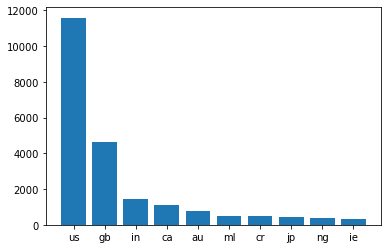

In [42]:
encoder = LabelEncoder().fit(loc_final_list)
loc_df = pd.DataFrame(encoder.transform(loc_final_list))
loc_count = pd.DataFrame(loc_df.value_counts())
x = [index[0] for index in loc_count.index.values][:10]
y = loc_count[0].to_list()[:10]
x_index = np.arange(len(x))
plt.bar(x_index, y, tick_label=encoder.inverse_transform(x), title="Number of tweets from countries")
print(encoder.inverse_transform(x))

## Training set tweet length
25-30 characters include most of the context in most tweets.

(array([7.800e+01, 5.780e+02, 1.748e+03, 2.812e+03, 3.689e+03, 3.563e+03,
        3.742e+03, 3.881e+03, 4.081e+03, 4.404e+03, 4.339e+03, 3.606e+03,
        2.438e+03, 1.313e+03, 5.660e+02, 2.190e+02, 6.700e+01, 2.200e+01,
        1.000e+01, 1.000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40.]),
 <BarContainer object of 20 artists>)

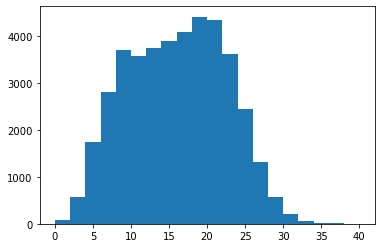

In [43]:
len_tweet = [len(tweet.split()) for tweet in train_df.CleanTweet]
plt.figure()
plt.hist(len_tweet, bins=20, title="Histogram of length of tweets")

## Test set tweet length

(array([  5.,  41., 128., 218., 258., 324., 310., 373., 360., 403., 403.,
        344., 322., 190.,  70.,  27.,  15.,   5.,   1.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40.]),
 <BarContainer object of 20 artists>)

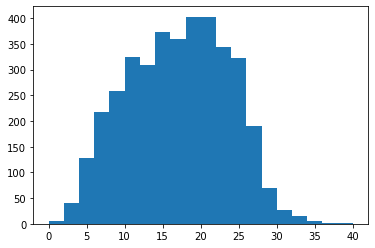

In [44]:
len_tweet = [len(tweet.split()) for tweet in test_df.CleanTweet]
plt.figure()
plt.hist(len_tweet, bins=20, title="Histogram of length of tweets")

## Tokenize text

In [45]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=15000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df.CleanTweet.values)
vocab_size = len(tokenizer.word_index)
print(vocab_size)

max_len = 25

sequences = tokenizer.texts_to_sequences(train_df.CleanTweet.values)
train_corpus = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, truncating='post', padding='post')

sequences = tokenizer.texts_to_sequences(test_df.CleanTweet.values)
test_corpus = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, truncating='post', padding='post')

train_target = train_df.Sentiment.values
test_target = test_df.Sentiment.values

32216


## Most frequent words/tokens

In [46]:
tokens = pd.DataFrame(dict(tokenizer.word_counts).values(), index=dict(tokenizer.word_counts).keys())

# most used words
tokens.sort_values(by=0, ascending=False).iloc[:10]

,0
us,13910
store,13105
market,9251
prices,7844
food,7481
goods,6597
customer,6179
people,5547
toiletpaper,5198
amp,5187


## Modeling
### Conv1D

In [ ]:
embd_dim = 32
batch = 32
epoch = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embd_dim, input_length=max_len),
    tf.keras.layers.Conv1D(embd_dim*8, 5, activation=tf.nn.relu),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(target_len, activation=tf.nn.sigmoid)
])

model.summary()
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_corpus, train_target, epochs=epoch, batch_size=batch, validation_data=(test_corpus, test_target))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 32)            1030944   
_________________________________________________________________
conv1d (Conv1D)              (None, 21, 256)           41216     
_________________________________________________________________
global_average_pooling1d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 1,105,701
Trainable params: 1,105,701
Non-trainable params: 0
_________________________________________________________________
Train on 41157 samples, validate on 3798 samples
Epoch 1/3


### Bidirectional LSTM

In [ ]:
embd_dim = 32
batch = 32
epoch = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embd_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embd_dim*8)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(target_len, activation=tf.nn.sigmoid)
])

model.summary()
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_corpus, train_target, epochs=epoch, batch_size=batch, validation_data=(test_corpus, test_target))

### Bidirectional GRU

In [ ]:
embd_dim = 32
batch = 32
epoch = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embd_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(embd_dim*8)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(target_len, activation=tf.nn.sigmoid)
])

model.summary()
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_corpus, train_target, epochs=epoch, batch_size=batch, validation_data=(test_corpus, test_target))

## Evaluate model

In [ ]:
test_predict = np.argmax(model.predict(test_corpus), axis=1)
test_df["Prediction"] = sentiment_encoder.inverse_transform(test_predict)
test_df["Misclassified"] = (test_eval_df.Sentiment==test_eval_df.Sentiment_pred).astype(int)
test_df.head(10)

In [ ]:
test_df.groupby(["Sentiment"]).Misclassified.describe()

In [ ]:
test_df.pivot_table(index="Sentiment", columns="Prediction", values="Misclassified", aggfunc=np.sum)

In [ ]:
test_predict = np.argmax(model.predict(test_corpus), axis=1)
test_predict_df = pd.DataFrame(test_target, columns=["target"])
test_predict_df= pd.concat([test_predict_df, pd.get_dummies(test_predict)], axis=1)
test_predict_df

encoder = {'Extremely Negative': 0,
           'Negative': 1,
           'Neutral': 2, 
           'Positive': 3, 'Extremely Positive': 4}

In [ ]:
test_eval_df = pd.DataFrame(test_predict_df.groupby(list(test_eval_df.index.names)).size(), columns=["count"])
percentage = []
for target in range(5):
    target_df = test_eval_df.loc[(slice(target, target))]
    for pred in range(len(target_df)):
        percentage.append(target_df.iloc[pred,0]*100 / target_df.values.sum())
test_eval_df["percentage"] = percentage
test_eval_df

### Observations
- Accuracy: Extremely Positive (81%) > Neutral (79%) > Positive (71%) > Negative (68%) = Extremely Negative (68%)
    - Positive 
- Positive and negative tweets are often misclassified as each other, but less as neutral
    - Negative tweets have higher possibility to be classified as positive than the other way around
    - Negative tweets have higher possibility to be classified as neutral than positive
    - Neutral tweets might not have obvious keywords to be classified by
- Extreme tweets are often misclassified with the regular/mild tweets, but less with opposite sentiment:
    - Extremely positive tweets are often confused with positive tweets
    - Extremely positive tweets are less confused with negative or extremely negative tweets
    - Extremely negative tweets are often confused with negative tweets
    - Extremely negative tweets are less confused with positive or extremely positive tweets
        - The extreme keywords might add more weight on sentiment classification
        - Consider running corpus through a sentiment classifier then a extreme text classifier
- Extremely tweets are less confused with opposite extreme tweets
- Some tweets are confused with the opposite sentiment
    - Negative tweets are confused with positive tweets
    - Positive tweets are confused with negative tweets
        - Sarcastic?
- Neutral tweets are often misclassified with both negative and positive tweets, slightly more with positive
- Neutral tweets are less confused with extreme tweets

## Improvements
- Add more neutral tweets
- Create an extreme sentiment classifier to identify keywords in extreme tweets in addition to sentiment classifier

## Export files for TensorFlow Embedding Projector
http://projector.tensorflow.org/

In [ ]:
import io
embd = model.layers[0]
weights = embd.get_weights()[0]
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])
out_v = io.open('covid-tweet_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('covid-tweet_meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()